In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [53]:
first_df = pd.read_csv('Data/RFP/2025_04_24.csv')[['EC#', 'Strain', 'Avg_OD600', 'Avg_GFP', 'Avg_RFP', 'Rel_RFP']]
second_df = pd.read_csv('Data/RFP/2025_04_24_secondmeasurement.csv')[['EC#', 'Strain', 'Avg_OD600', 'Avg_GFP', 'Avg_RFP', 'Rel_RFP']]
third_df = pd.read_csv('Data/RFP/2025_04_24_thirdmeasurement.csv')[['EC#', 'Strain', 'Avg_OD600', 'Avg_GFP', 'Avg_RFP', 'Rel_RFP']]

first_df['Rep'] = 1
second_df['Rep'] = 2
third_df['Rep'] = 3

df = pd.concat([first_df, second_df, third_df], ignore_index=True)
df = df.sort_values(by=['EC#', 'Rep'], ignore_index=True)
df.head(10)

,EC#,Strain,Avg_OD600,Avg_GFP,Avg_RFP,Rel_RFP,Rep
0,33,pClone_GFP,0.178331,5.155400e+05,5791.166670,32474,1
1,33,pClone_GFP,0.340217,5.909457e+05,7450.333333,21899,2
2,34,P533A,0.091953,4.463880e+05,64155.166700,697698,1
3,34,P533A,0.295065,7.084137e+05,138717.833300,470127,2
4,35,P5,0.163669,1.391900e+05,353329.667000,2158810,1
5,35,P5,0.362198,2.659952e+05,349778.333300,965711,2
6,36,OsmY,0.069388,1.902548e+06,126919.167000,1829128,1
7,36,OsmY,0.264411,4.508661e+06,245599.833300,928857,2
8,37,OsmY_C12A,0.084288,2.120625e+06,221796.167000,2631408,1
9,37,OsmY_C12A,0.277999,4.889728e+06,459233.333300,1651925,2


In [57]:
df_range = first_df[['EC#', 'Strain']].sort_values(by=['EC#'], ignore_index=True)

df_range['Min'] = df.groupby('EC#')['Rel_RFP'].min().values
df_range['Max'] = df.groupby('EC#')['Rel_RFP'].max().values
df_range['range'] = df_range['Max'] - df_range['Min']

df_range = df_range.sort_values(by=['range'], ascending=False)

df_range.head(None)

,EC#,Strain,Min,Max,range
22,109,p1000 (del_22A),1999159,29371420,27372261
6,63,low_dG (high_expr),4397898,20156627,15758729
16,103,p1000 (del_23T),7001113,17520132,10519019
21,108,p800,10696003,19277620,8581617
17,104,p600,3651934,8066690,4414756
18,105,p650,1530244,3818960,2288716
12,99,p625,2938190,5092500,2154310
19,106,p700 (del_21C),2671825,4111751,1439926
2,35,P5,965711,2158810,1193099
23,112,p750 (del_22A),627306,1636350,1009044


In [50]:
percentile = df_range['range'].quantile(0.7)
filtered_df = df_range[df_range['range'] > percentile]

first_df = first_df[first_df['EC#'].isin(filtered_df['EC#'])]
second_df = second_df[second_df['EC#'].isin(filtered_df['EC#'])]
third_df = third_df[third_df['EC#'].isin(filtered_df['EC#'])]

dfs = [first_df, second_df, third_df]

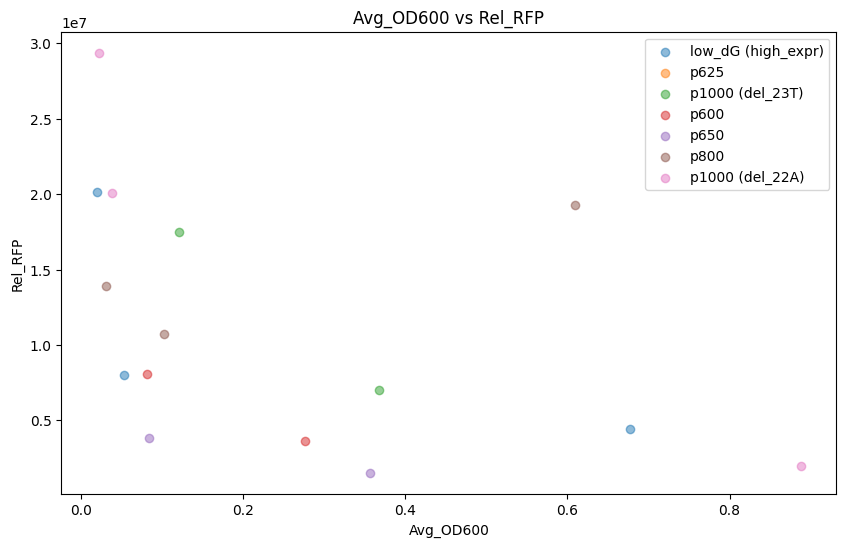

In [51]:
strains = filtered_df['Strain'].unique()
cmap = plt.get_cmap('tab10')
strain_colors = {strain: cmap(i) for i, strain in enumerate(strains)}

legend_set = set()

plt.figure(figsize=(10, 6))

for df in dfs:
    for strain in strains:
        strain_df = df[df['Strain'] == strain]
        plt.scatter(
            strain_df['Avg_OD600'],
            strain_df['Rel_RFP'],
            color=strain_colors[strain],
            label=strain if strain not in legend_set else "",
            alpha=0.5,
        )
        legend_set.add(strain)

plt.legend()

plt.xlabel('Avg_OD600')
plt.ylabel('Rel_RFP')
plt.title('Avg_OD600 vs Rel_RFP')
plt.show()